In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from glob import glob

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import tensorflow as tf
import cv2
import os
import pickle
import numpy as np

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import add
from tensorflow.keras.layers import AveragePooling2D,GlobalAveragePooling2D,Concatenate,Lambda
import sklearn.metrics as metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam

In [3]:
BATCH_SIZE = 24
image_size = 224

In [4]:
model1 = tf.keras.models.load_model('/kaggle/input/models4/models4/model1.h5', compile= False)
model2 = tf.keras.models.load_model('/kaggle/input/models4/models4/model2.h5', compile= False)
model3 = tf.keras.models.load_model('/kaggle/input/models4/models4/model3.h5', compile= False)
model4 = tf.keras.models.load_model('/kaggle/input/models4/models4/model4.h5', compile= False)
model5 = tf.keras.models.load_model('/kaggle/input/models4/models4/model5.h5', compile= False)

In [5]:
models = [model1,model2,model3,model4,model5]

In [6]:
from collections import Counter

def most_common_element(lst):
    counter = Counter(lst)
    most_common = counter.most_common(1)[0][0]
    count = counter[most_common]
    return most_common_element, count

In [7]:
predictions_list = []
def predict(models, img):
    for model in models:
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)

        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        predictions_list.append(predicted_class)
    prediction, count = most_common_element(predictions_list)
    return prediction, count

In [9]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/data-224-v2/data_224/', shuffle=True,image_size=(image_size, image_size),seed=200, validation_split=0.2,subset='training', )
val_dataset = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/data-224-v2/data_224/', shuffle=True,image_size=(image_size, image_size), seed=200,validation_split=0.3,subset='validation')

Found 10457 files belonging to 2 classes.
Using 8366 files for training.
Found 10457 files belonging to 2 classes.
Using 3137 files for validation.


In [12]:
class_names = train_dataset.class_names
class_names

['fakes', 'reals']

1/1 [==============================] - 0s 133ms/step


ValueError: num must be an integer with 1 <= num <= 9, not 10

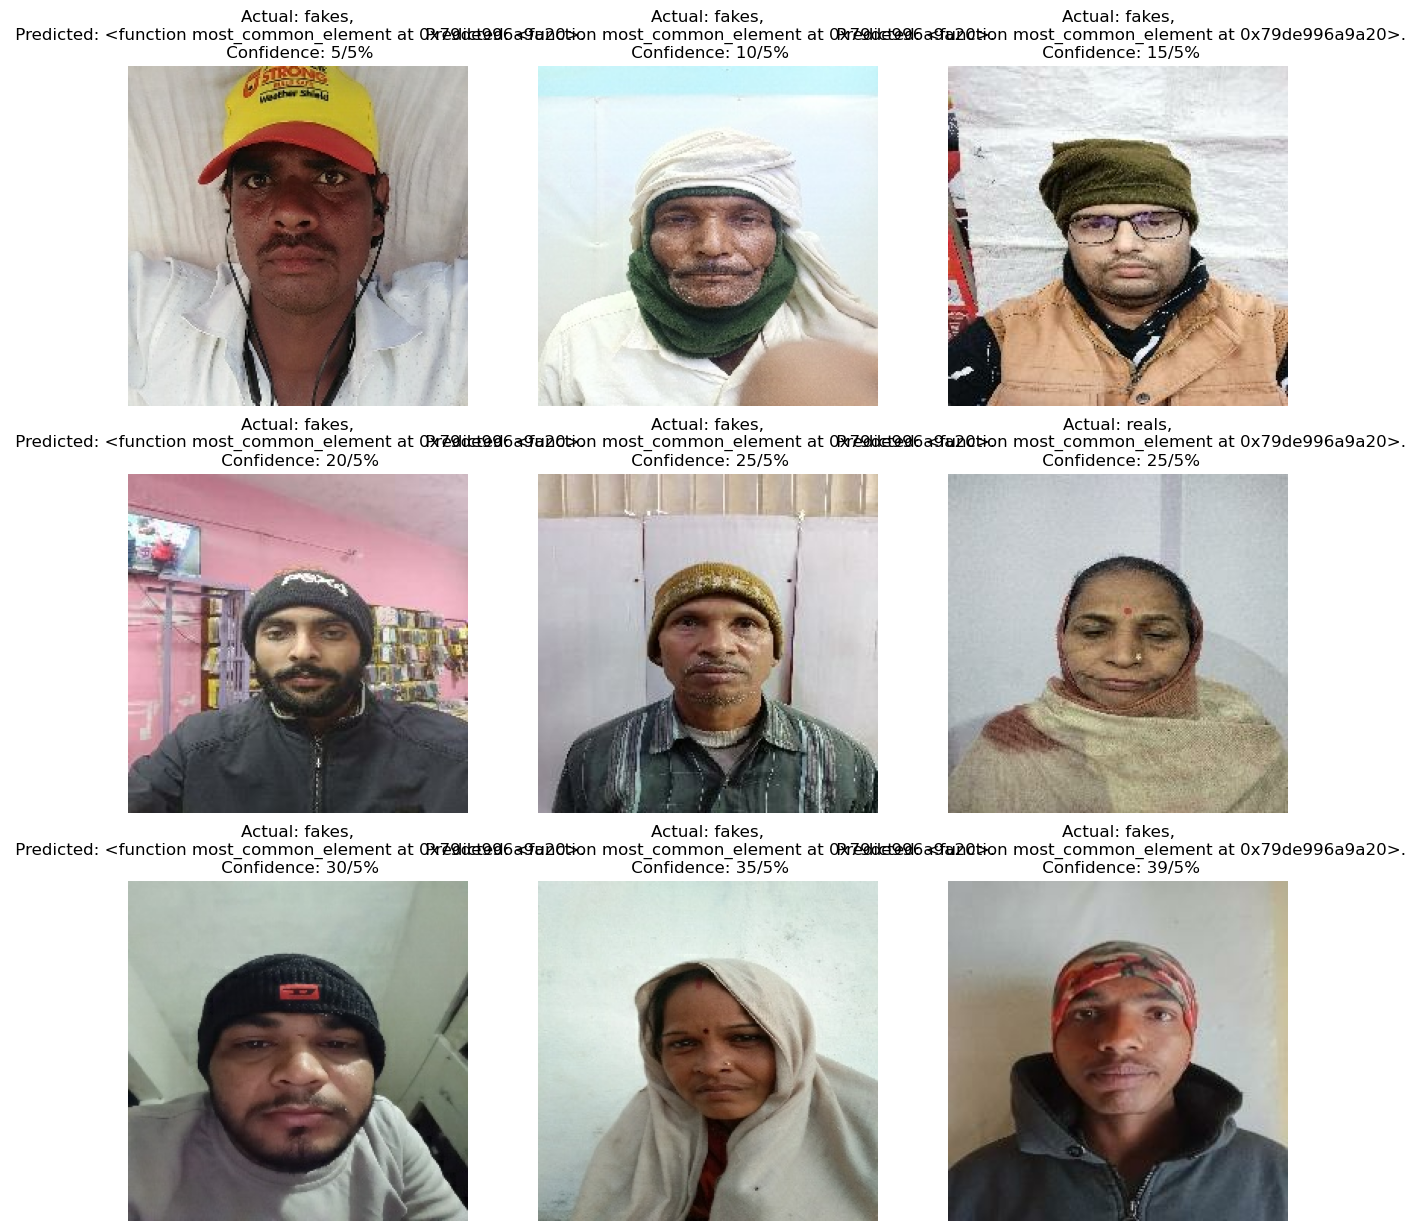

In [13]:
plt.figure(figsize=(15, 15))
for images, labels in val_dataset.take(1):
    for i in range(32):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, count = predict(models, images[i].numpy())
        actual_class = class_names[labels[i]] 

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {count}/{len(models)}%")

        plt.axis("off")